<a href="https://colab.research.google.com/github/ValentinaBykova/neuron/blob/master/lab4/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №4
## студентки КН-31, Бикової Валентини
## Тема: Neural Network Classification with TensorFlow

## Завдання
#### На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.

#### Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).



In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

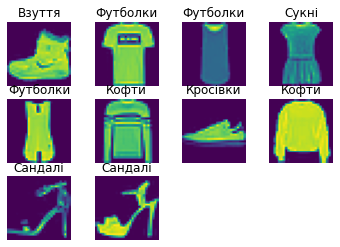

In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['Футболки', 'Штани', 'Кофти', 'Сукні', 'Пальто', 'Сандалі', 'Спідниці', 'Кросівки', 'Сумки', 'Взуття']
for i in range(len(class_names)):
  qx = plt.subplot(3, 4, i+1)
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i]])
  plt.axis(False)

In [18]:
tf.random.set_seed(42)
x_train = x_train / 255.0
x_test = x_test / 255.0
model_fashion_mnist = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])
model_fashion_mnist.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
training = model_fashion_mnist.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

#### Для моделювання використати 3 класи індекси

In [20]:
tf.random.set_seed(42)

def data_filter_normalize(x, y):
  x_sorted, y_sorted = [], []

  for i in range(len(y)):
    if y[i] == 0:
      x_sorted.append(x[i])
      y_sorted.append(0)
    elif y[i] == 3:
      x_sorted.append(x[i])
      y_sorted.append(1)
    elif y[i] == 7:
      x_sorted.append(x[i])
      y_sorted.append(2)

  x_sorted = tf.constant(x_sorted, dtype="float32") / 255.0
  y_sorted = tf.constant(y_sorted)

  return x_sorted, y_sorted


x_train_sort_norm, y_train_sort_norm = data_filter_normalize(x_train, y_train)
x_test_sort_norm, y_test_sort_norm = data_filter_normalize(x_test, y_test)

model_fashion_mnist_final = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax'),
])

model_fashion_mnist_final.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
history = model_fashion_mnist_final.fit(x_train_sort_norm, y_train_sort_norm, epochs=10, validation_data=(x_test_sort_norm, y_test_sort_norm))

Epoch 1/10
563/563 [==============================] - 2s 2ms/step - loss: 0.6636 - accuracy: 0.7883 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 2/10
563/563 [==============================] - 1s 2ms/step - loss: 0.2801 - accuracy: 0.8978 - val_loss: 0.2078 - val_accuracy: 0.9220
Epoch 3/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1822 - accuracy: 0.9286 - val_loss: 0.1699 - val_accuracy: 0.9333
Epoch 4/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1554 - accuracy: 0.9374 - val_loss: 0.1527 - val_accuracy: 0.9420
Epoch 5/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1424 - accuracy: 0.9433 - val_loss: 0.1450 - val_accuracy: 0.9413
Epoch 6/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1344 - accuracy: 0.9474 - val_loss: 0.1369 - val_accuracy: 0.9503
Epoch 7/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1286 - accuracy: 0.9494 - val_loss: 0.1328 - val_accuracy: 0.9527
Epoch 

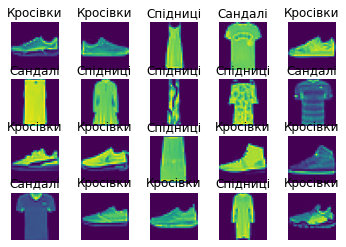

In [21]:
y_predicted = model_fashion_mnist_final.predict(x_test_sort_norm)
class_names = ['Сандалі', 'Спідниці', 'Кросівки']
for i in range(20):
  ax = plt.subplot(4, 5, i + 1)
  plt.imshow(x_test_sort_norm[i])
  plt.title(class_names[np.where(y_predicted[i] == np.amax(y_predicted[i]))[0][0]])
  plt.axis(False)

#### Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.

In [19]:
tf.random.set_seed(42)
model_fashion_mnist2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
model_fashion_mnist2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
find_lr_history = model_fashion_mnist2.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

## Висновок
#### Під час даної лабораторної роботи я розібралась з класифікацію за допомогою TensorFlow та застосувала ці знання під час роботи над набором даних Fashion MNIST. А саме, побудувала нейромережу для вирішення клавифікації, експереметальним шляхом виявила оптимальний крок градієнту і застосувала його на остаточній нейромережі.